In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sn
from single_photons.utils.constants import *

In [2]:
random_signal = 0.00175*np.random.randn(int(1e5))

In [3]:
freq, p = sn.welch(random_signal, fs=1e6, nperseg=5e3)

(10000.0, 100000.0)

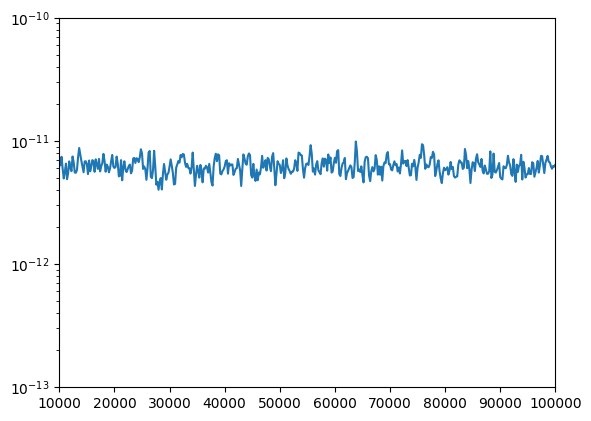

In [4]:
plt.plot(freq, p)
plt.yscale('log')
plt.ylim([1e-13, 1e-10])
plt.xlim([1e4, 1e5])

In [5]:
calib_factor = 8e-9
random_signal_pos = 0.00175*calib_factor*np.random.randn(int(1e5))

In [33]:
0.00175*calib_factor/zp_x

6.6734168514503285

In [22]:
omega = 409282.306543384
rho=2200
R = 147e-9
m = rho*(4*np.pi*R**3/3)
zp_x = np.sqrt(hbar/(2*omega*m))

(10000.0, 100000.0)

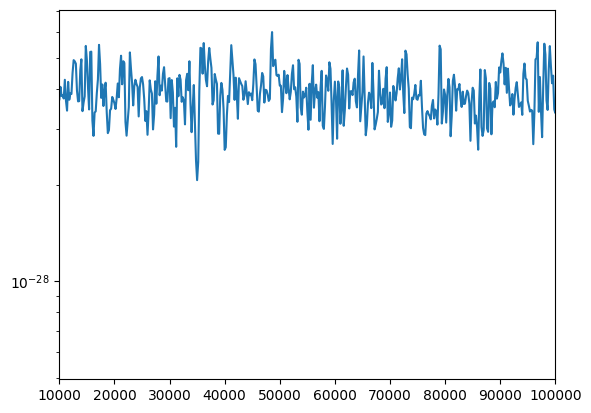

In [23]:
freq, p = sn.welch(random_signal_pos, fs=1e6, nperseg=5e3)
plt.plot(freq, p)
plt.yscale('log')
#plt.ylim([1e-13, 1e-10])
plt.xlim([1e4, 1e5])

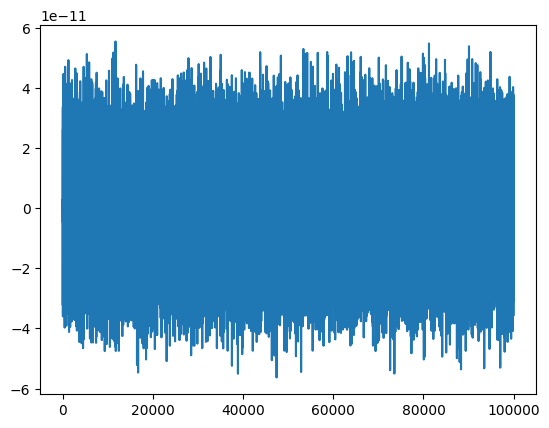

In [24]:
plt.plot(random_signal_pos)

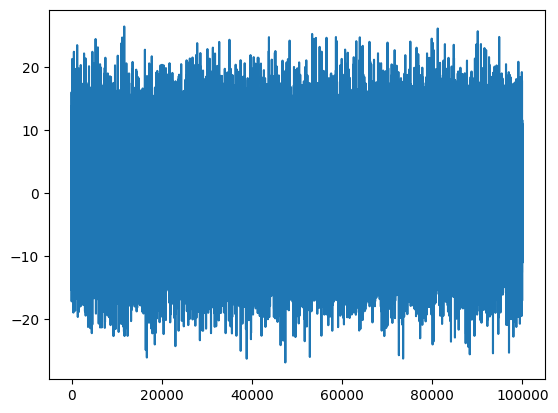

In [25]:
plt.plot(random_signal_pos/zp_x)

In [26]:
(random_signal_pos/zp_x).std()

6.666367370186715

(10000.0, 100000.0)

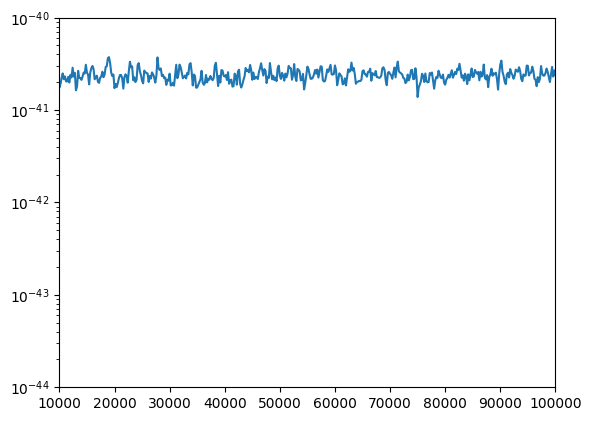

In [30]:
random_ba = 5.5e-18*np.random.randn(int(1e5))
freq, p = sn.welch(random_ba, fs=1e6, nperseg=5e3)
plt.plot(freq, (1/np.sqrt(2*np.pi))*p)
plt.yscale('log')
plt.ylim([1e-44, 1e-40])
plt.xlim([1e4, 1e5])

In [28]:
back_force = 5.5e-18
back_force_normalized = back_force/np.sqrt(hbar*omega*m/2)
back_force_normalized

154732.53652896697

In [32]:
np.power(np.sqrt(1e-9)*back_force_normalized, 2)/(4*np.pi)

1.905256385907495